In [80]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.table import Table
from astropy.coordinates import SkyCoord
import astropy.units as u 
import matplotlib as mpl
import matplotlib.patches as patches
from matplotlib.patches import Ellipse
from astropy.coordinates import Distance

In [81]:
hdul = fits.open('Cone_GaiaDR3_G345.fits')
hdul = hdul[1].data
t = Table(hdul)

In [82]:
# RA = 256.09542°, Dec = -40.73986°

center = SkyCoord(ra=256.09542*u.deg, dec=-40.73986*u.deg)
coords = SkyCoord(
    ra=t['ra'] * u.deg,
    dec=t['dec'] * u.deg
)

sep = center.separation(coords)
radius = 35 * u.arcmin
maskradius = sep <= radius
t = t[maskradius]

In [83]:
plx=t['parallax']
plx_err = t['parallax_error']
print(len(plx))
mask = np.where((plx < 0.5) & (plx > 0.417)) 

92707


In [84]:
ra = t['ra']
dec = t['dec']
l = t['l']
b = t['b']

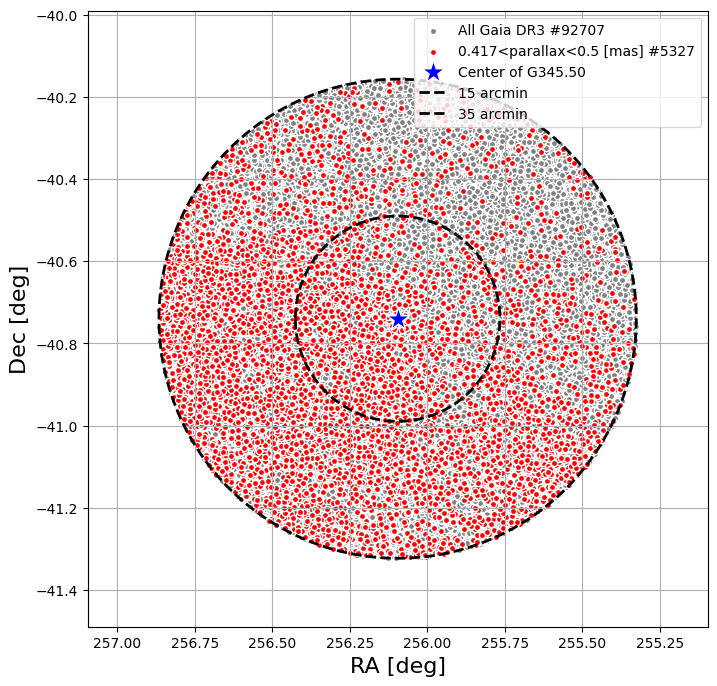

In [85]:
fig, ax = plt.subplots(figsize = (8, 8))

center_ra = 256.09542
center_dec = -40.73986

radii_arcmin = [15, 35]

ax.scatter(ra, dec, color = 'gray', edgecolor = 'w', s = 20, label = f"All Gaia DR3 #{len(ra)}")
ax.scatter(ra[mask], dec[mask], color = 'red', edgecolor = 'w', s = 20, label = f"0.417<parallax<0.5 [mas] #{len(ra[mask])}")
ax.scatter(center_ra, center_dec, color = 'blue', edgecolor = 'w', marker = "*", s= 300, label = "Center of G345.50")
ax.set_xlabel('RA [deg]', fontsize = 16)
ax.set_ylabel('Dec [deg]', fontsize = 16)
ax.invert_xaxis()

for r_arcmin in radii_arcmin:
    r_deg = r_arcmin / 60
    # Create circle points
    theta = np.linspace(0, 2 * np.pi, 200)
    # Dec offset is direct
    dec_circle = center_dec + r_deg * np.sin(theta)
    # RA offset is divided by cos(dec) to account for spherical projection
    ra_circle = center_ra + (r_deg * np.cos(theta)) / np.cos(np.deg2rad(center_dec))
    ax.plot(ra_circle, dec_circle, '--', color='black',lw=2, label=f"{r_arcmin} arcmin")

range = 0.75
ax.set_xlim(256.09542 - 1, 256.09542 + 1)
ax.set_ylim(-40.73986 - range, -40.73986 + range)
ax.invert_xaxis()

ax.grid()
ax.legend(loc='upper right')
plt.savefig('gaiadr3_scatter_g345.png', bbox_inches='tight')
plt.show()